In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(legacy='1.13')



## 🧪 Practice 1: Simulating Logit Market Shares

### 🎯 Goal
Simulate market shares for 5 products in a single market using a basic logit demand model with an outside option.

---

### ⚙️ Setup

- Product characteristic: $x_j \sim \mathcal{N}(0, 1)$  
- Price: $p_j \sim \mathcal{U}(1, 5)$  
- Parameters: $\beta = 2$, $\alpha = 1.5$

Mean utility:
$$
\delta_j = x_j \cdot \beta - \alpha \cdot p_j
$$

Market share:
$$
s_j = \frac{e^{\delta_j}}{1 + \sum_{k=1}^{5} e^{\delta_k}}, \quad
s_0 = \frac{1}{1 + \sum_{k=1}^{5} e^{\delta_k}}
$$

---

### ✅ Tasks

1. Simulate $x_j$, $p_j$
2. Compute $\delta_j$, $s_j$, and $s_0$
3. Plot:
   - Price vs. market share  
   - Characteristic vs. market share

In [4]:
# Simulaton:
def mean_utility(beta, alpha, N): #one mean utility 
    x = np.random.normal(0,1, N)
    p = np.random.uniform(1,5, N)
    return x*beta - alpha*p

def market_share(delta_array):
    # print(delta_array)
    no_product = len(delta_array)
    output = np.zeros(no_product+1)
    denom = 1 + sum([np.exp(i) for i in delta_array])
    for i in range(no_product):
        output[i] = np.exp(delta_array[i])/denom
    output[-1] = 1 - sum(output)
    # print(output)
    return output


market_share(mean_utility(10,3,5))
# notice that as soon as there is a positive mean-utility, the buy-zero market is zero: if any delta is significantly positive, denom easily become large 
# "that's normal in logit: a single very good product can almost cannibalize the outside option"
# why does negative mean-utility product still have market share: becuse all products have positive prob of being chosen 

m_utility = []
share = []
# visualization: mean utility ~ market share
for i in range(200):
    temp = mean_utility(beta,alpha,7)
    m_utility.extend(list(temp))
    share.extend(list(market_share(temp)[:-1]))

# print(m_utility)
plt.scatter(m_utility, share)
# observe not market share increased with mean utility non-linearly 

NameError: name 'beta' is not defined

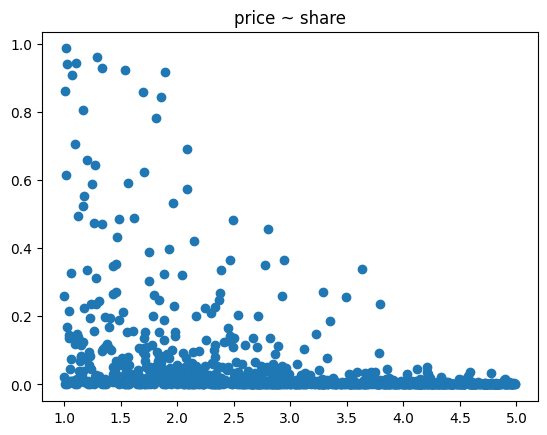

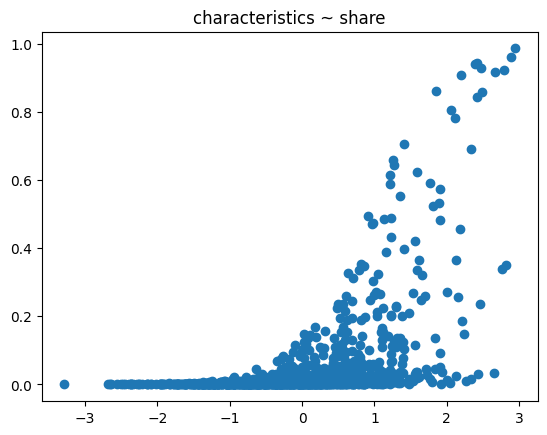

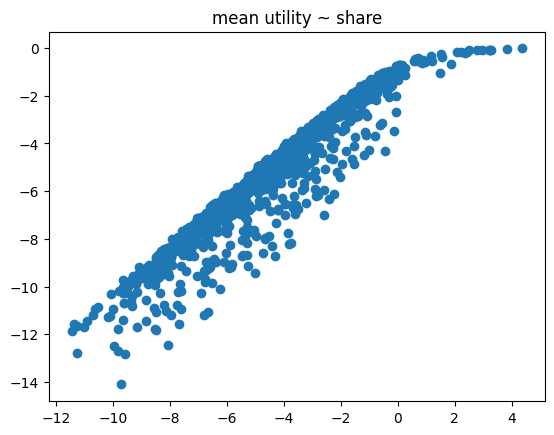

In [12]:
# visualization: price ~ market share 
price_record = []
char_record = []
utility_record = []
share_record = []
beta, alpha = 2,1.5
for i in range(100):
    x = np.random.normal(0,1, 10)
    char_record.extend(x)

    p = np.random.uniform(1,5, 10)
    price_record.extend(p)

    mean_utility = x*beta - alpha*p
    utility_record.extend(mean_utility)
    temp_share = market_share(mean_utility)
    share_record.extend(temp_share[:-1])

plt.scatter(price_record,share_record)
plt.title("price ~ share") #negatively correlated 
plt.show()
# why is it that price and share seemingly does not correlate 
plt.scatter(char_record,share_record)
plt.title("characteristics ~ share") #positively, non-linearly correlated 
plt.show()
plt.scatter(utility_record, np.log(share_record))
# plt.scatter(utility_record, share_record)
plt.title("mean utility ~ share") # "nearly linear"
plt.show()

